# Random Forest Regression
Important:I should also try with sales/customer for a specific store

In [55]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

In [56]:
df = pd.read_csv("dataset/preprocessed_train.csv")

In [57]:
df.shape

(523021, 51)

### Feature engineering

# RANDOM FOREST REGRESSION

In [58]:
df = df.drop(['NumberOfSales'], axis=1)
#df = df.drop(['Region','Events'], axis=1)
# I could leave events

#for now let's drop unusable categorical vars
df = df.drop(['StoreType','AssortmentType','Events'], axis=1)

In [59]:
df.head().T

,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,01/03/2016,02/03/2016,04/03/2016,05/03/2016,06/03/2016
IsHoliday,0,0,0,0,0
IsOpen,1,1,1,1,0
HasPromotions,0,0,0,0,0
StoreType,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market
AssortmentType,General,General,General,General,General
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,495,608,665,630,622.769


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [61]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop('NumberOfSales', axis=1).values, df.NumberOfSales.values,\
 #                                                   test_size = 0.2)

In [62]:
import modify_dataset as md
train = md.get_fake_train(df)
test = md.get_fake_test(df)

In [63]:
train.shape

(479205, 50)

In [64]:
test.shape

(43816, 50)

### Selecting predictive features 

In [65]:
features = list(train.columns.values)
features.remove('NumberOfCustomers')
features.remove('StoreID')
features.remove('D_Year')
features.remove('Date')
features.remove('IsOpen')
features.remove('AssortmentType')
features.remove('Events')
features.remove('StoreType')
print("features")

print(features)

features
['IsHoliday', 'HasPromotions', 'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK', 'CloudCover', 'Max_Dew_PointC', 'Max_Humidity', 'Max_Sea_Level_PressurehPa', 'Max_TemperatureC', 'Max_VisibilityKm', 'Max_Wind_SpeedKm_h', 'Mean_Dew_PointC', 'Mean_Humidity', 'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC', 'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h', 'Min_Dew_PointC', 'Min_Humidity', 'Min_Sea_Level_PressurehPa', 'Min_TemperatureC', 'Min_VisibilitykM', 'Precipitationmm', 'WindDirDegrees', 'D_Day', 'D_DayOfYear', 'D_Month', 'StoreType_SuperMarket', 'StoreType_HyperMarket', 'StoreType_StandardMarket', 'StoreType_ShoppingCenter', 'AssortmentType_General', 'AssortmentType_WithNFDept', 'AssortmentType_WithFishDept', 'Events_Fog', 'Events_Hail', 'Events_Rain', 'Events_Snow', 'Events_Thunderstorm']


In [66]:
train[features].head().T

,0,1,2,3,4
IsHoliday,0.0,0.0,0.0,0.0,0.0
HasPromotions,0.0,0.0,0.0,0.0,0.0
NearestCompetitor,326.0,326.0,326.0,326.0,326.0
Region,7.0,7.0,7.0,7.0,7.0
Region_AreaKM2,9643.0,9643.0,9643.0,9643.0,9643.0
Region_GDP,17130.0,17130.0,17130.0,17130.0,17130.0
Region_PopulationK,2770.0,2770.0,2770.0,2770.0,2770.0
CloudCover,8.0,8.0,8.0,6.0,6.0
Max_Dew_PointC,1.0,0.0,0.0,-3.0,0.0
Max_Humidity,100.0,87.0,81.0,80.0,93.0


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
model1 = RandomForestRegressor(n_estimators=4, max_depth=20, n_jobs=-1, verbose=2)

In [69]:
# Can I choose to give it numpy arrays or pandas df or I can only pass np arrays?
model1.fit(train[features], train['NumberOfCustomers'])

building tree 1 of 4building tree 2 of 4building tree 3 of 4building tree 4 of 4





[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   11.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [70]:
idx = model1.feature_importances_.argsort()[::-1]

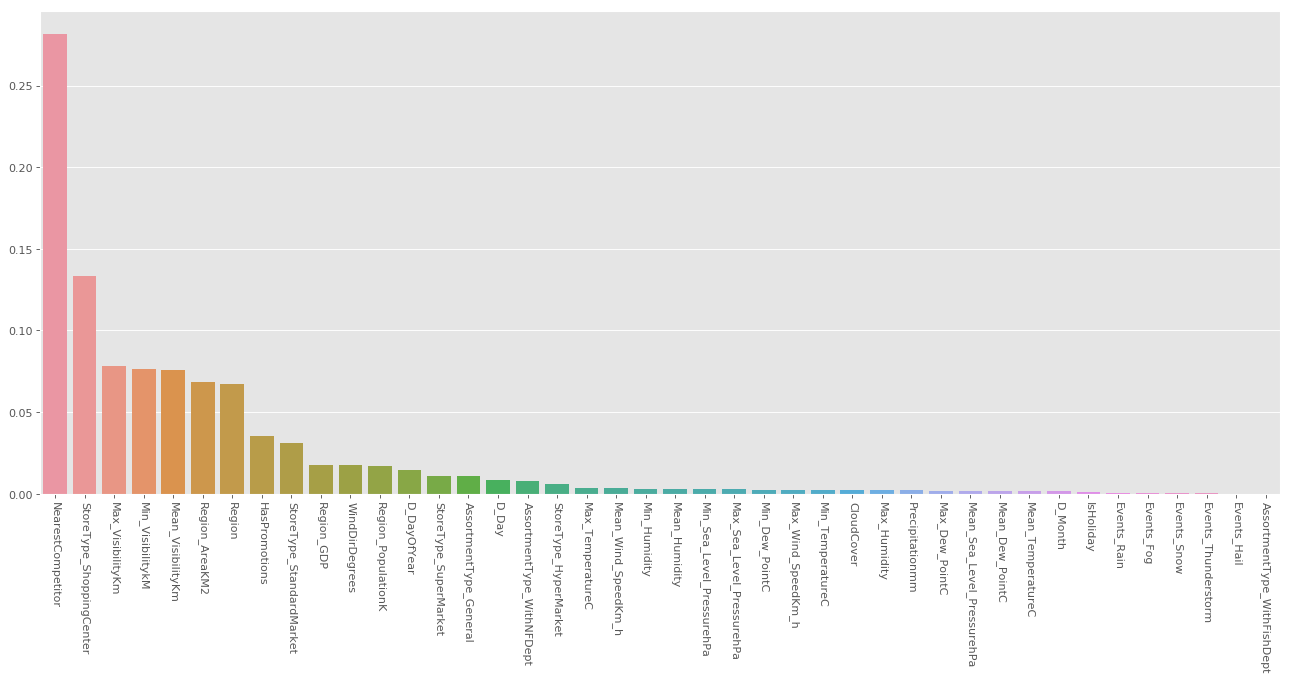

In [71]:
ax = sns.barplot(x=df[features].columns[idx], y=model1.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

## Predict

In [72]:
df_days = test[((df['D_Month'] == 1) | (df['D_Month'] == 2)) & (df['D_Year'] == 2018)]

days = df_days['Date'].loc[:'Date'].values
len(days)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


43816

In [73]:
days=list(set(days))

In [74]:
len(days)

59

In [75]:
days=sorted(days)
days

['01/01/2018',
 '01/02/2018',
 '02/01/2018',
 '02/02/2018',
 '03/01/2018',
 '03/02/2018',
 '04/01/2018',
 '04/02/2018',
 '05/01/2018',
 '05/02/2018',
 '06/01/2018',
 '06/02/2018',
 '07/01/2018',
 '07/02/2018',
 '08/01/2018',
 '08/02/2018',
 '09/01/2018',
 '09/02/2018',
 '10/01/2018',
 '10/02/2018',
 '11/01/2018',
 '11/02/2018',
 '12/01/2018',
 '12/02/2018',
 '13/01/2018',
 '13/02/2018',
 '14/01/2018',
 '14/02/2018',
 '15/01/2018',
 '15/02/2018',
 '16/01/2018',
 '16/02/2018',
 '17/01/2018',
 '17/02/2018',
 '18/01/2018',
 '18/02/2018',
 '19/01/2018',
 '19/02/2018',
 '20/01/2018',
 '20/02/2018',
 '21/01/2018',
 '21/02/2018',
 '22/01/2018',
 '22/02/2018',
 '23/01/2018',
 '23/02/2018',
 '24/01/2018',
 '24/02/2018',
 '25/01/2018',
 '25/02/2018',
 '26/01/2018',
 '26/02/2018',
 '27/01/2018',
 '27/02/2018',
 '28/01/2018',
 '28/02/2018',
 '29/01/2018',
 '30/01/2018',
 '31/01/2018']

In [76]:
lags_list = ['t-14','t-7','t-1','t-2','t-9','t-8','t-6','t-15','t-21','t-13','t-20']

In [77]:
#saving cheat test to test with perfect lags later
test_cheat = md.get_fake_test(df)

In [78]:
df_train_test = df
df_train_test['_NumberOfCustomers'] = df_train_test['NumberOfCustomers']
df_train_test.loc[((df['D_Month'] == 1) | (df['D_Month'] == 2)) & (df['D_Year'] == 2018),\
                lags_list + ['_NumberOfCustomers']] = 0


KeyError: "['t-14' 't-7' 't-1' 't-2' 't-9' 't-8' 't-6' 't-15' 't-21' 't-13' 't-20'] not in index"

In [26]:
df_train_test.loc[(df_train_test['D_Year'] == 2018)].T

,649,650,651,652,653,654,655,656,657,658,...,522990,522991,522992,522993,522994,522995,522996,522997,522998,522999
StoreID,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748
Date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-02-19,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28
IsHoliday,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IsOpen,1,1,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,0,1,1,1
HasPromotions,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,0,0,0,0,0
NearestCompetitor,326,326,326,326,326,326,326,326,326,326,...,4607,4607,4607,4607,4607,4607,4607,4607,4607,4607
Region,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
NumberOfCustomers,642,746,333,622.769,536,501,622.769,671,609,568,...,342,370,347,323,340,170,311.679,266,337,300
Region_AreaKM2,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,...,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,...,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130


In [27]:
# in order to avoid to re-run each time the whole notebook
df_train_test_ = df_train_test

store_rows_shapes = []

for d in days:
    stores_rows = df_train_test_.loc[(df_train_test_['Date'].values == d)]

    store_rows_shapes.append((stores_rows.shape, d))
    # stores_rows.head()

    lags_ordered = [7, 14, 1, 2, 9, 8, 6, 15, 21, 13, 20]
    lags_name = ['t-' + str(i) for i in lags_ordered]

    for i in range(len(lags_ordered)):
        stores_rows[lags_name[i]] = df_train_test_['_NumberOfCustomers'].shift(lags_ordered[i])

    # stores_pred = model.predict(stores_rows[features])
    stores_pred = model1.predict(stores_rows[features])
    # print(stores_pred[:5])
    df_stores_pred = pd.DataFrame(stores_pred, columns=['_NumberOfCustomers'], index=stores_rows.index)

    new_column = pd.Series(stores_pred, name='_NumberOfCustomers', index=stores_rows.index)
    df_train_test_.update(new_column)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s f

In [28]:
n = 2106
df_train_test_[n:n+50].T

,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,...,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155
StoreID,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002,...,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002
Date,2017-12-31,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,...,2018-02-09,2018-02-10,2018-02-11,2018-02-12,2018-02-13,2018-02-14,2018-02-15,2018-02-16,2018-02-17,2018-02-18
IsHoliday,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IsOpen,0,1,1,1,0,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,0
HasPromotions,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
NearestCompetitor,370,370,370,370,370,370,370,370,370,370,...,370,370,370,370,370,370,370,370,370,370
Region,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
NumberOfCustomers,379.586,420,422,198,379.586,406,346,379.586,433,396,...,368,299,379.586,381,354,353,361,347,358,379.586
Region_AreaKM2,407,407,407,407,407,407,407,407,407,407,...,407,407,407,407,407,407,407,407,407,407
Region_GDP,13155,13155,13155,13155,13155,13155,13155,13155,13155,13155,...,13155,13155,13155,13155,13155,13155,13155,13155,13155,13155


In [29]:
test = df_train_test_[((df['D_Month'] == 1) | (df['D_Month'] == 2)) & (df['D_Year'] == 2018)]

In [30]:
print(test.shape)
test.head(20).T

(43816, 50)


,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668
StoreID,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,2018-01-11,2018-01-12,2018-01-13,2018-01-14,2018-01-15,2018-01-16,2018-01-17,2018-01-18,2018-01-19,2018-01-20
IsHoliday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsOpen,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1
HasPromotions,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0
NearestCompetitor,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Region,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
NumberOfCustomers,642,746,333,622.769,536,501,622.769,671,609,568,512,552,486,622.769,657,619,580,584,621,534
Region_AreaKM2,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130,17130


In [31]:
test['_NumberOfCustomers'] = model1.predict(test[features])

[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## BIP Error day by day test

In [172]:
from BIP_error import get_BIP_error
error1 = get_BIP_error(test)

Number of regions identified: 11
BIP total error: 0.1252956111922612


## BIP Error cheat test

In [173]:
from BIP_error import get_BIP_error
error1 = get_BIP_error(test_cheat)

Number of regions identified: 11
BIP total error: 0.05237344149148031


In [35]:
# calculationg R2

# calculate RSS
df_RSS = test
print(df_RSS.shape)

df_RSS['sqrd_diff'] = df_RSS.apply(lambda x: (x['NumberOfCustomers'] - x['_NumberOfCustomers'])**2, axis=1)

RSS = df_RSS['sqrd_diff'].sum()
print('RSS:', RSS)
df_RSS.head()

(43816, 51)
RSS: 372562413.4085276


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,StoreID,Date,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,Region_AreaKM2,Region_GDP,...,t-6,t-15,t-21,t-13,t-20,MeanStoreSales,MeanRegionSales,D_Day_of_week,_NumberOfCustomers,sqrd_diff
649,1000,2018-01-01,0,1,0,326,7,642.000000,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,0,650.000000,64.000000
650,1000,2018-01-02,0,1,0,326,7,746.000000,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,1,576.294778,28799.862509
651,1000,2018-01-03,0,1,0,326,7,333.000000,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,2,576.294778,59192.348809
652,1000,2018-01-04,1,0,0,326,7,622.769231,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,3,555.794778,4485.577377
653,1000,2018-01-05,0,1,0,326,7,536.000000,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,4,576.294778,1623.669102


In [36]:
# calculate TSS

df_TSS = test
NS_mean = df_TSS['NumberOfCustomers'].mean()
print('NS_mean', NS_mean)

df_TSS['sqrd_diff'] = df_TSS.apply(lambda x:  (x['_NumberOfCustomers'] - NS_mean)**2, axis=1)
TSS = df_TSS['sqrd_diff'].sum()
print('TSS:', TSS)
df_TSS.head()

NS_mean 298.2849164113321
TSS: 1006275723.8896785


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,StoreID,Date,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,Region_AreaKM2,Region_GDP,...,t-6,t-15,t-21,t-13,t-20,MeanStoreSales,MeanRegionSales,D_Day_of_week,_NumberOfCustomers,sqrd_diff
649,1000,2018-01-01,0,1,0,326,7,642.000000,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,0,650.000000,123703.500024
650,1000,2018-01-02,0,1,0,326,7,746.000000,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,1,576.294778,77289.482920
651,1000,2018-01-03,0,1,0,326,7,333.000000,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,2,576.294778,77289.482920
652,1000,2018-01-04,1,0,0,326,7,622.769231,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,3,555.794778,66311.328611
653,1000,2018-01-05,0,1,0,326,7,536.000000,9643,17130,...,0.0,0.0,0.0,0.0,0.0,7682.751625,4698.572717,4,576.294778,77289.482920


In [37]:
# calculate R2
print("RSS:", RSS, "   TSS:", TSS)

R2 = 1 - (RSS / TSS)
print('R_2:', R2)


RSS: 372562413.4085276    TSS: 1006275723.8896785
R_2: 0.6297611036780085


### Saving TEST

In [21]:
#test.to_csv('./dataset/RFR5_fake_test.csv', index=False)

In [23]:
estim = model1.estimators_ 

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [25]:
mean_absolute_error(test['NumberOfSales'], test['_NumberOfSales'])


436.93390778221755

In [26]:
r2_score(test['NumberOfSales'], test['_NumberOfSales'])

0.8937596992483917

In [27]:
#defining mape
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true = y_true.reshape(1, -1)
    y_pred = y_pred.reshape(1, -1)
    #y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
mean_absolute_percentage_error(test['NumberOfSales'], test['_NumberOfSales'])

C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


inf

In [29]:
X_train

NameError: name 'X_train' is not defined

In [30]:
X_test[:, [3]].shape

NameError: name 'X_test' is not defined

In [31]:
print("Residual sum of squares: %.2f"
  % ((y_pred - y_test) ** 2).sum())

#why memory error??

NameError: name 'y_pred' is not defined

In [32]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


def rmspe_xg(yhat, y):
   # y = y.values
   # y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [33]:
rmspe_xg(y_pred,y_test)

NameError: name 'y_pred' is not defined

## Sample of predicted results

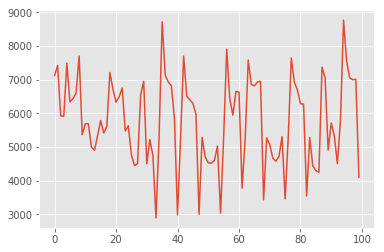

In [34]:
import matplotlib.pyplot as plt

y_pred_subset = test['_NumberOfSales'][500:600]
x_coordinate = [ 1 * i for i in range(len(y_pred_subset)) ]
plt.plot(x_coordinate,y_pred_subset)
plt.show()

## Sample of real results

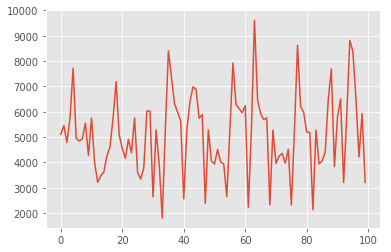

In [35]:
#REAL
import matplotlib.pyplot as plt

y_train_subset = test['NumberOfSales'][500:600]
x_coordinate = [ 1 * i for i in range(len(y_train_subset)) ]
plt.plot(x_coordinate,y_train_subset)
plt.show()

## Real-Predicted

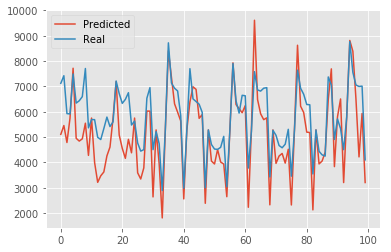

In [36]:
plt.plot(x_coordinate,y_train_subset)
plt.plot(x_coordinate,y_pred_subset)

plt.legend(['Predicted', 'Real'], loc='upper left')
plt.show()

### Saving model

In [ ]:
#import pickle
#RFR_1 = pickle.dumps(model1)
#clf2 = pickle.loads(s)
#clf2.predict(X[0:1])
#pickle.dump(model1, open("models\RFR_1","wb"))
#model1 = pickle.load(file=open("models\RFR_1","rb"))

## For the submission

In [ ]:
df_test = pd.read_csv

In [ ]:
df_test.IsOpen.unique()

In [ ]:
ind_open = df_test.IsOpen == 1
ind_closed = df_test.IsOpen == 0
df_test2 = df_test[ind_open]

In [ ]:
df_test2.drop('IsOpen', axis=1, inplace=True)

In [ ]:
df_test2.head().T

In [ ]:
X_out = df_test2.values

In [ ]:
y_out = model1.predict(X_out)

In [ ]:
df_out = pd.DataFrame(np.zeros(len(df_test)), columns=['NumberOfSales'])

In [ ]:
df_out[ind_open] = y_out.reshape(-1,1)

In [ ]:
df_out.set_index(np.arange(len(df_out))+1, inplace=True)

In [ ]:
df_out.index.name = 'Id'

In [ ]:
df_out.head()